In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np 
import os 
import shutil
import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid_imgs = pd.read_excel("./COVID-19_Radiography_Dataset/COVID.metadata.xlsx", engine='openpyxl')
covid_imgs.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
opacity_imgs = pd.read_excel("./COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx", engine='openpyxl')
opacity_imgs.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
normal_imgs = pd.read_excel("./COVID-19_Radiography_Dataset/Normal.metadata.xlsx", engine='openpyxl')
normal_imgs.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
pneumonia_imgs = pd.read_excel("./COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx", engine='openpyxl')
pneumonia_imgs.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [ ]:
ROOT_DIR = "./COVID-19_Radiography_Dataset/"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

NEW_DIR = "./all_images/"

In [ ]:
print(imgs[0])
print(imgs[1])
print(imgs[2])
print(imgs[3])

COVID
Lung_Opacity
Normal
Viral Pneumonia


In [ ]:
if not os.path.exists(NEW_DIR):
    os.mkdir(NEW_DIR)
    
    for i in imgs:
        org_dir = os.path.join(ROOT_DIR,i+"/")
        
        for imgfile in glob.iglob(os.path.join(org_dir,"*.png")):
            shutil.copy(imgfile,NEW_DIR)
else:
    print("Already Exist")

Already Exist


In [ ]:
counter = {"COVID":0,"Lung_Opacity":0,"Normal":0,"Viral Pneumonia":0}

for image in imgs:
    for count in glob.iglob(NEW_DIR+image+"*"):
        counter[image] += 1

print(counter)

{'COVID': 0, 'Lung_Opacity': 0, 'Normal': 0, 'Viral Pneumonia': 0}


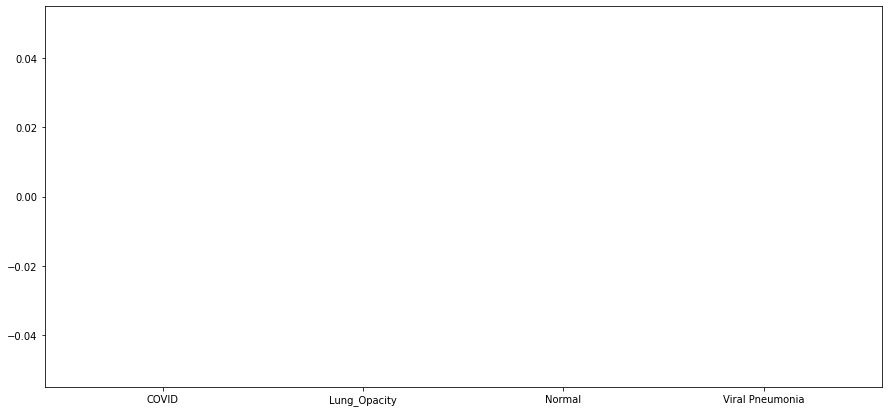

In [ ]:
plt.rcParams['figure.figsize'] = [15,7]
plt.bar(x=counter.keys(),height=counter.values())
plt.show()

x = 3616*0.7,6012*0.7,10192*0.7,1345*0.7
y = 3616*0.2,6012*0.2,10192*0.2,1345*0.2
z = 3616*0.1,6012.0.1,10192*0.1,1345*0.1

In [ ]:
if not os.path.exists(NEW_DIR+"train_test_split/"):
    
    os.makedirs(NEW_DIR+"train_test_split/")
    
    os.makedirs(NEW_DIR+"train_test_split/train/COVID")
    os.makedirs(NEW_DIR+"train_test_split/test/COVID")
    os.makedirs(NEW_DIR+"train_test_split/validation/COVID")
    
    os.makedirs(NEW_DIR+"train_test_split/train/Normal")
    os.makedirs(NEW_DIR+"train_test_split/test/Normal")
    os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
    
    os.makedirs(NEW_DIR+"train_test_split/train/Lung Opacity")
    os.makedirs(NEW_DIR+"train_test_split/test/Lung Opacity")
    os.makedirs(NEW_DIR+"train_test_split/validation/Lung Opacity")
    
    os.makedirs(NEW_DIR+"train_test_split/train/Viral Pneumonia")
    os.makedirs(NEW_DIR+"train_test_split/test/Viral Pneumonia")
    os.makedirs(NEW_DIR+"train_test_split/validation/Viral Pneumonia")
    
    for i in np.random.choice(replace= False , size= 2531 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
        os.remove(i)

    for i in np.random.choice(replace= False , size= 7134 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
        os.remove(i)
        
    for i in np.random.choice(replace= False , size= 4208 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/train/Lung Opacity" )
        os.remove(i)

    for i in np.random.choice(replace= False , size= 941 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/train/Viral Pneumonia" )
        os.remove(i)

    # Validation Data
    for i in np.random.choice(replace= False , size= 723 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
        os.remove(i)

    for i in np.random.choice(replace= False , size= 2038 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
        os.remove(i)
        
    for i in np.random.choice(replace= False , size= 1202 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/validation/Lung Opacity" )
        os.remove(i)

    for i in np.random.choice(replace= False , size= 269 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/validation/Viral Pneumonia" )
        os.remove(i)


    # Test Data
    for i in np.random.choice(replace= False , size= 362 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
        os.remove(i)

    for i in np.random.choice(replace= False , size= 1020 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
        os.remove(i)
        
    for i in np.random.choice(replace= False , size= 602 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/test/Lung Opacity" )
        os.remove(i)

    for i in np.random.choice(replace= False , size= 135 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
        shutil.copy(i , NEW_DIR+"train_test_split/test/Viral Pneumonia" )
        os.remove(i)


In [ ]:
# train_path  = "./all_images/train_test_split/train"
# valid_path  = "./all_images/train_test_split/validation"
# test_path   = "./all_images/train_test_split/test"

train_path  = "/content/drive/MyDrive/all_images2/train_test_split/train"
valid_path  = "/content/drive/MyDrive/all_images2/train_test_split/validation"
test_path   = "/content/drive/MyDrive/all_images2/train_test_split/test"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 1428 images belonging to 4 classes.


In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 1899 images belonging to 4 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 1333 images belonging to 4 classes.


In [ ]:
train.class_indices

{'COVID': 0, 'Lung Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

In [ ]:
class_type = {0:'COVID', 1:'Lung Opacity', 2:'Normal', 3:'Viral Pneumonia'}

In [ ]:
t_img , label = train.next()

In [ ]:
len(t_img)

32

In [ ]:
def plotImages(img_arr, label):
    
  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


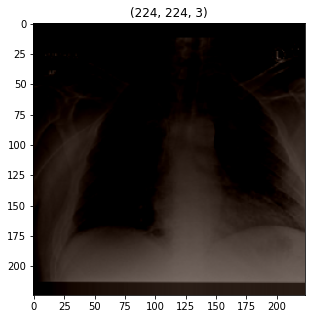

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


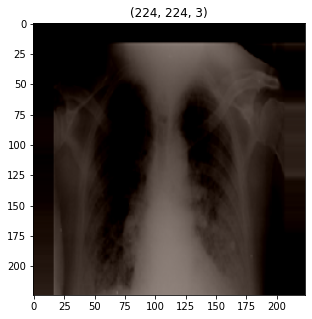

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


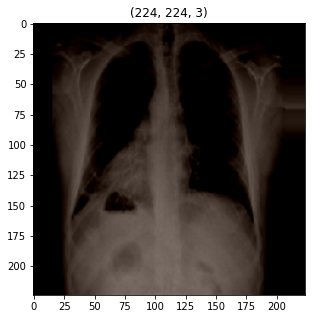

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


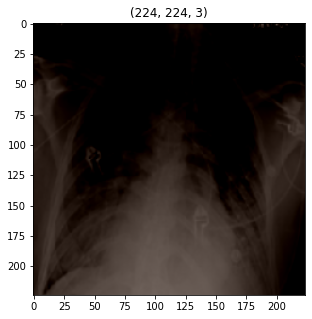

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


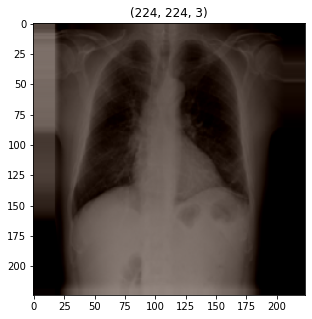

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


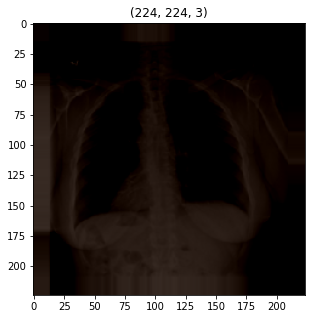

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


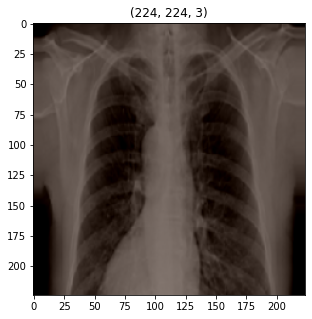

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


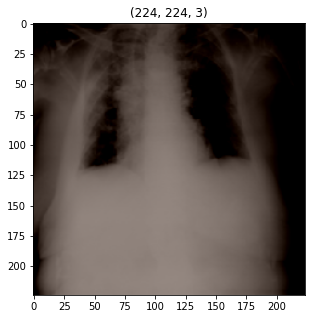

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


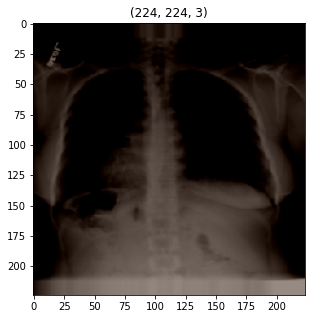

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


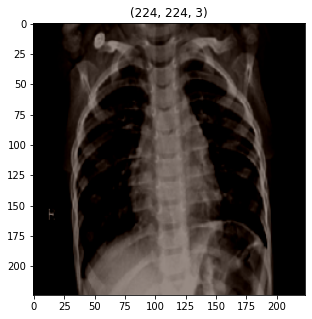

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


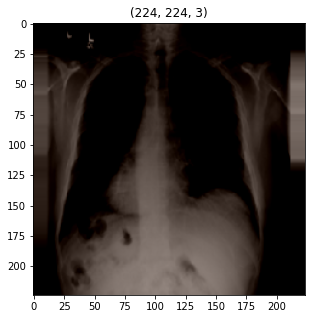

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


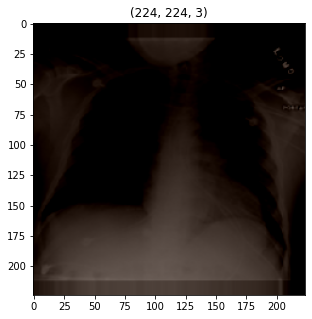

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


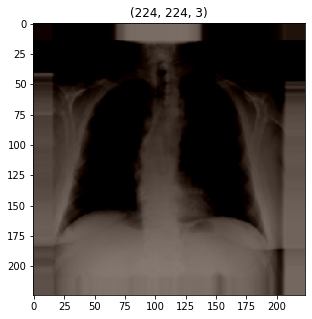

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


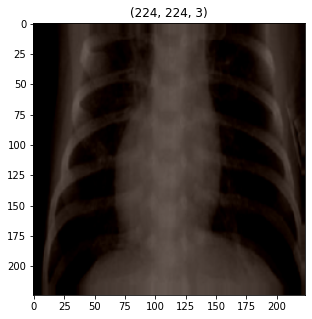

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


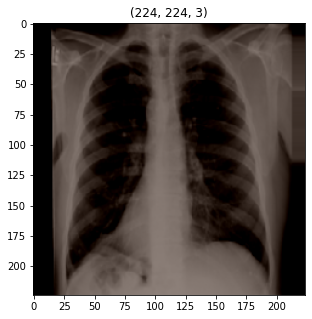

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


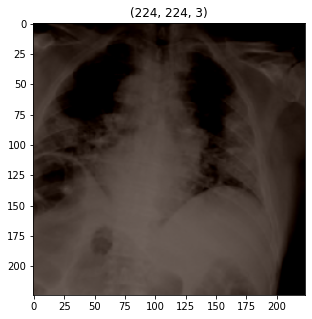

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


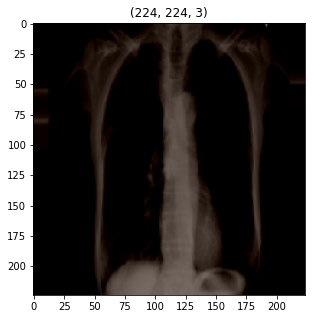

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


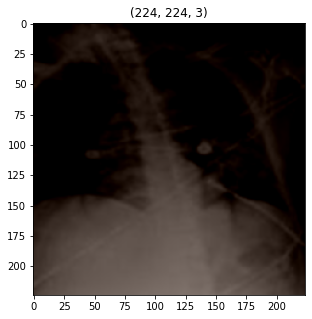

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


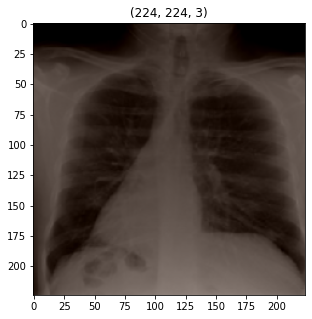

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


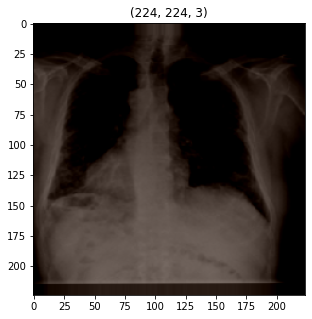

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


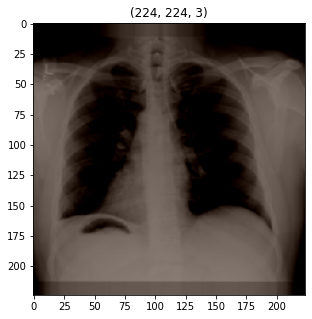

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


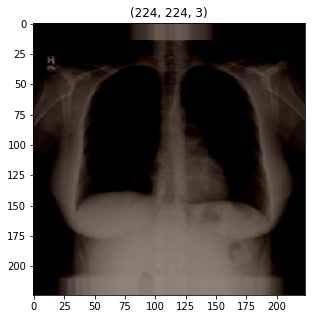

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


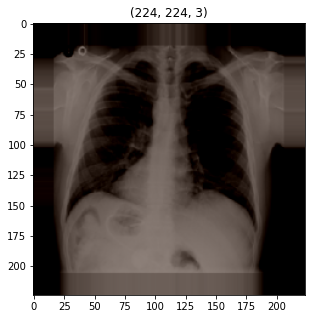

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


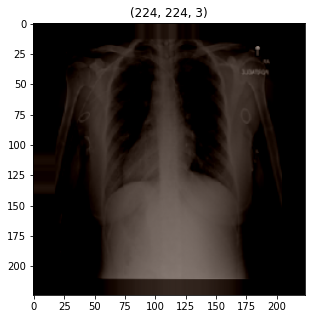

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


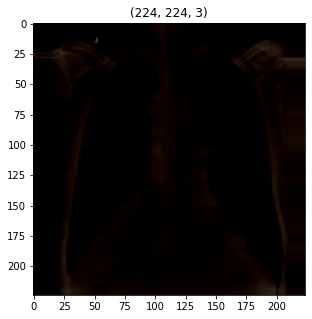

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


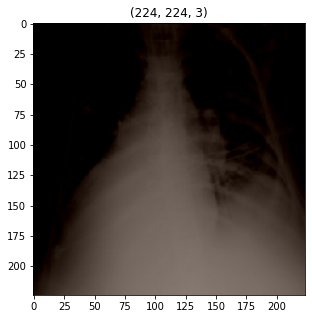

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


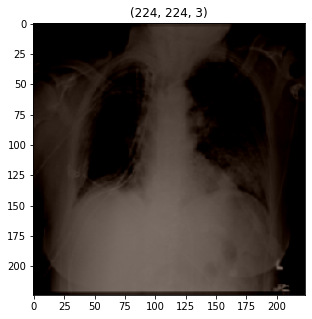

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


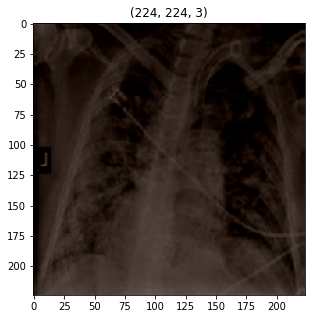

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


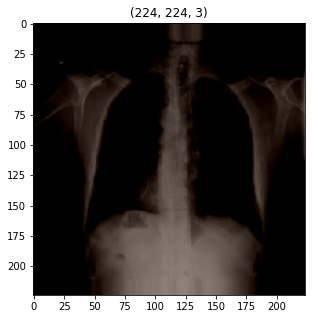

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


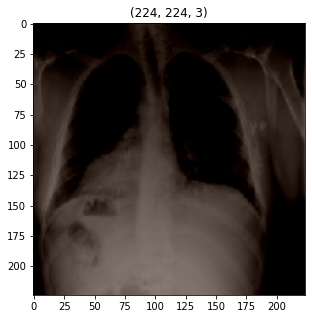

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


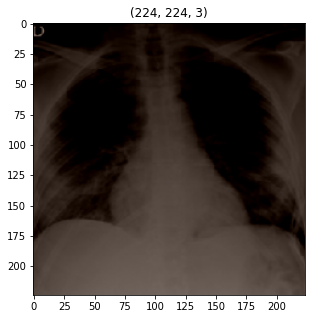

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


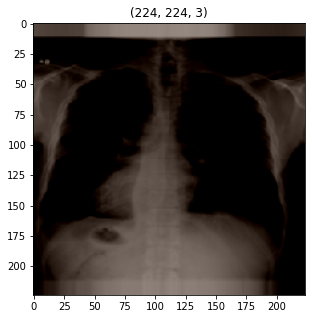

In [ ]:
plotImages(t_img, label)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
vgg = VGG16( input_shape=(224,224,3), include_top= False)

In [ ]:
for l in vgg.layers:
  l.trainnable= false

In [ ]:
x = Flatten()(vgg.output)
x = Dense(units=4 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
#mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32)#, callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - 401s 42s/step - loss: 3.6843 - accuracy: 0.3063 - val_loss: 1.6841 - val_accuracy: 0.4492
Epoch 2/30
10/10 [==============================] - 359s 38s/step - loss: 1.3051 - accuracy: 0.4219 - val_loss: 1.2641 - val_accuracy: 0.4736
Epoch 3/30
10/10 [==============================] - 365s 38s/step - loss: 1.2909 - accuracy: 0.4500 - val_loss: 1.1981 - val_accuracy: 0.4844
Epoch 4/30
10/10 [==============================] - 364s 38s/step - loss: 1.2007 - accuracy: 0.4719 - val_loss: 1.1917 - val_accuracy: 0.5117
Epoch 5/30
10/10 [==============================] - 351s 37s/step - loss: 1.1759 - accuracy: 0.4906 - val_loss: 1.2474 - val_accuracy: 0.4512
Epoch 6/30
10/10 [==============================] - 545s 58s/step - loss: 1.2522 - accuracy: 0.4219 - val_loss: 1.1924 - val_accuracy: 0.4932
Epoch 7/30
10/10 [==============================] - 337s 35s/step - loss: 1.2219 - accuracy: 0.4906 - val_loss: 1.1966 - val_accuracy: 0.4697
Epoch 

In [ ]:
from keras.models import load_model
model = load_model("bestmodel.h5") #model = load_model("bestmodel2.h5")

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

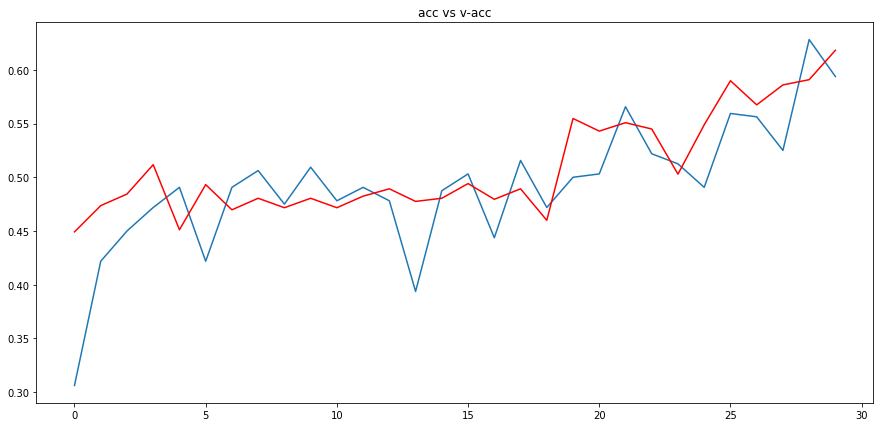

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

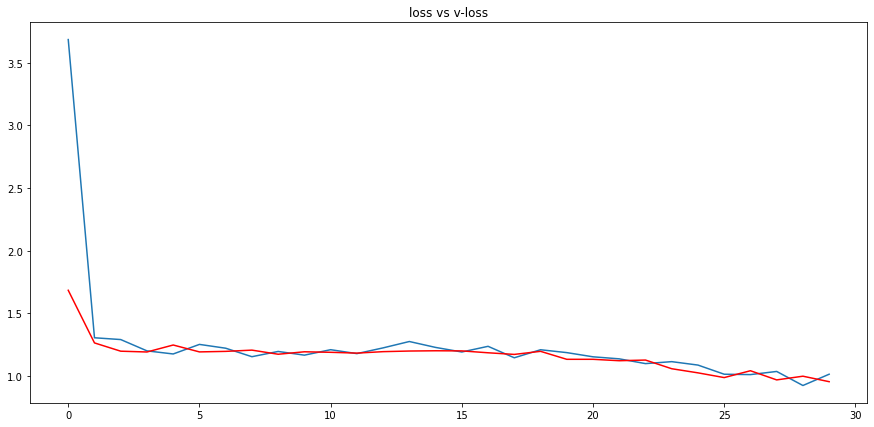

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.6309580206871033 %


In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Normal

The chances of image being Covid is : 59.89152193069458 percent

The chances of image being Lung Opacity is : 44.396549463272095 percent

The chances of image being Normal is : 79.80053424835205 percent

The chances of image being Viral Pneumonia is : 13.728460669517517 percent


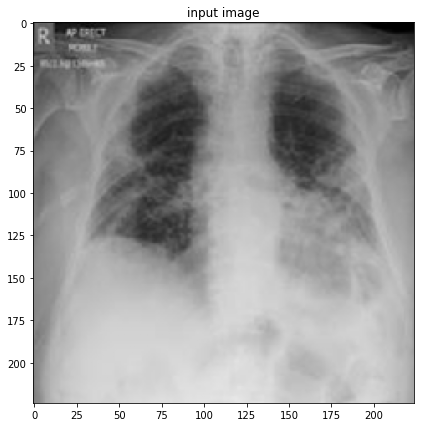

In [ ]:
path = "./all_images/train_test_split/test/COVID/COVID-177.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Lung Opacity is : {model.predict(img)[0][1]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][2]*100} percent")
print()
print(f"The chances of image being Viral Pneumonia is : {model.predict(img)[0][3]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [ ]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [ ]:
def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
    """
    input:  is the image path, name of last convolution layer , model name
    output : returs the predictions and the area that is effected
    """
    
    
    
    img_array = get_img_array(path)

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    img = get_img_array(path)

    res = class_type[np.argmax(model.predict(img))]
    print(f"The given X-Ray image is of type = {res}")
    print()
    print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
    print(f"The chances of image being Lung Opacity is : {model.predict(img)[0][1]*100} %")
    print(f"The chances of image being Normal is : {model.predict(img)[0][2]*100} %")
    print(f"The chances of image being Viral Pneumonia is : {model.predict(img)[0][3]*100} %")

    print()
    print("image with heatmap representing the covid spot")

    # function call
    save_and_display_gradcam(path, heatmap)

    print()
    print("the original input image")
    print()

    a = plt.imread(path)
    plt.imshow(a, cmap = "gray")
    plt.title("Original image")
    plt.show()

The given X-Ray image is of type = Normal

The chances of image being Covid is : 59.89152193069458 %
The chances of image being Lung Opacity is : 44.396549463272095 %
The chances of image being Normal is : 79.80053424835205 %
The chances of image being Viral Pneumonia is : 13.728460669517517 %

image with heatmap representing the covid spot


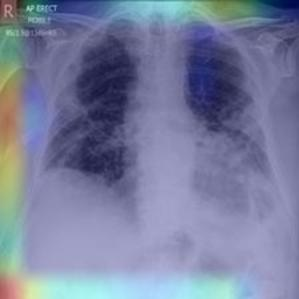


the original input image



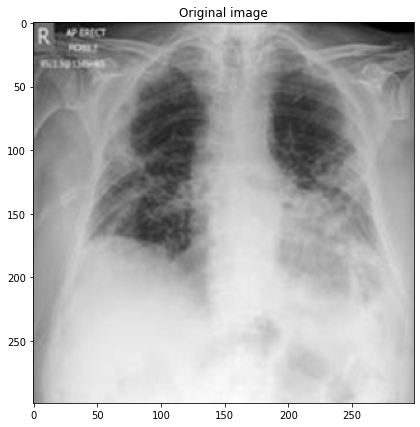

In [ ]:
path = "./all_images/train_test_split/test/COVID/COVID-177.png"

image_prediction_and_visualization(path)

The given X-Ray image is of type = Normal

The chances of image being Covid is : 61.51728630065918 %
The chances of image being Lung Opacity is : 41.02095365524292 %
The chances of image being Normal is : 77.88645029067993 %
The chances of image being Viral Pneumonia is : 15.502786636352539 %

image with heatmap representing the covid spot


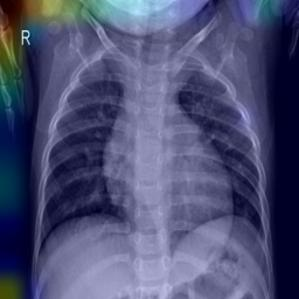


the original input image



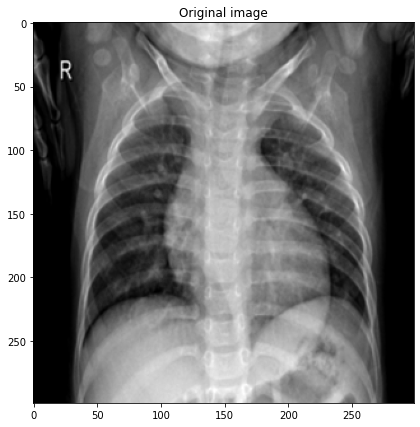

In [ ]:
path = "./all_images/train_test_split/test/Normal/Normal-135.png"

image_prediction_and_visualization(path)